<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Regresion-Lineal/blob/main/2_Regresion_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En esta ocasión, usaremos algebra lineal para entender que tanto se separa nuestros data points. Esta es una métrica muy importante para saber que tan bien se desempeña un modelo de regresión lineal.

En este caso utilizaremos la librería **Scikit-Learn** (que sirvce para mahcine learning) con los siguientes modulos:

* **linear_model**: con el cual entrenamos un modelo de machine learning de regresión lineal.
* **train_test_split**: que nos sirve separar datos de entrenamiento y pruebas.
* **metrics**: donde podemos encontrar formas de medir el desempeño de nuestro modelo.

In [47]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

Seguimos usando el mismo dataset de pingüinos del notebook anterior.

In [2]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


El dataset viene con datos nulos, que no nos sirven para entrenar un modelo de machine learning. Por ende, los contaremos y luego los eliminaremos. 

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
df.dropna(inplace=True)

Para este ejercicio, crearemos un gráfico de correlación linear como el que hicimos anteriormente. En este caso suponemos que existe una relación entre la masa corporal de los pingüinos y el tamaño de sus alas.

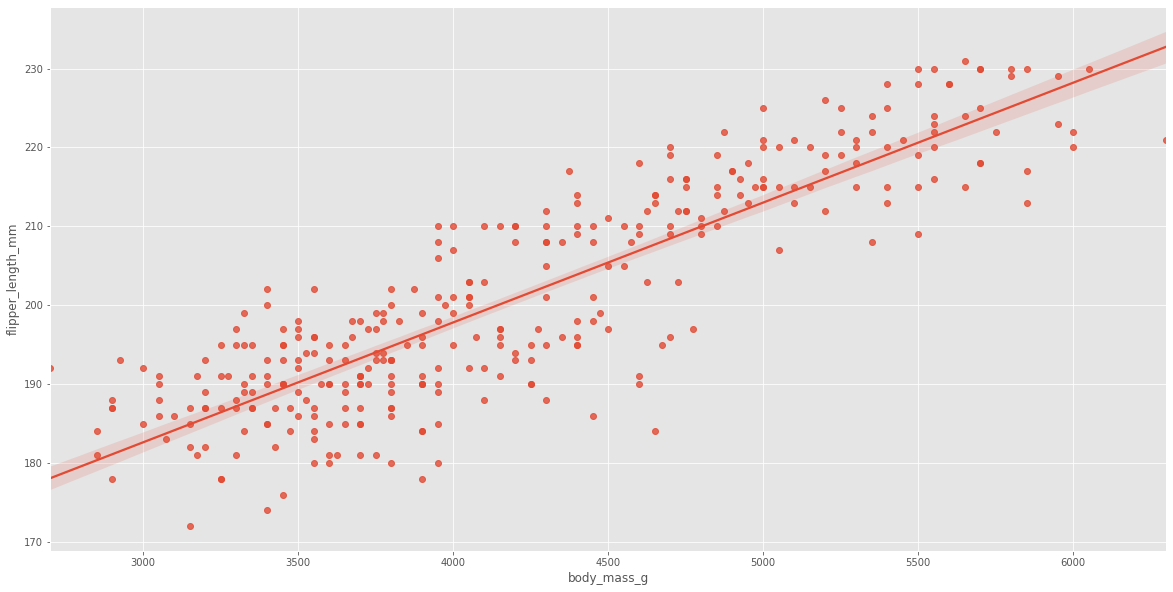

In [45]:
sns.regplot(x=df["body_mass_g"], y=df["flipper_length_mm"])

# Entrenamiento del Modelo

A partir de la correlación linear anterior, entrenaremos un modelo simple de regresión linear. 

Lo primero es crear dos vectores. En este caso usamos la masa corporal como nuestro vector X (predictor) y el tamaño de las alas como el vector y (valor por predecirse).

La función *train_test_split* es fundamental en machine learning, ya que nos divide nuestro data sets en datos de entrenamiento y prueba. Los datos de prueba nos servirán para medir el desempeño de nuestro modelo.

Las funciones *values* y *reshape* nos permiten crear un arreglo artificial en 2D que nos permitirá entrenar nuestro modelo.

Para entrenar al modelo, solo tenemos que invocar a *Linear Regression* y luego entrenar al modelo con la función *fit*.

In [48]:
X = df["body_mass_g"].values.reshape(-1,1)
y = df["flipper_length_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [49]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Suma de Errores Cuadráticos

En este modelo tenemos ya un modelo entrenado y listo para ser medido.

*Scikit Learn* no tiene un modulo para calcular la summa de errores cuadráticos por lo que lo haremos manualemente.

Lo que tenemos es una vector llamado *y_test* (datos reales) que utiliza a *X_test* para generar una predicción. Lo que hacemos con una sola línea de código es sumar todos los vectores al cuadrado.

In [71]:
sec = np.sum((y_test - reg.predict(X_test))**2)
sec

2913.7808139174745

# Otras Métricas de Desempeño

En este caso usamos dos métricas adicionales que vienen preconstruidas en *Scikit Learn*. 

Por un lado tenemos al promedio de los errores cuadráticos (mean_squared_error). Como su nombre lo indica, hace un promedio de los errores cuadráticos en vez de sumarlos.

Una métrica que se usa popularmente en regresión linear son los mínimos cuadrados ordinarios (r²). Este genera un rango de 0 a 1 para medir la varianza capturada por el modelo. 


In [65]:
y_test_predict = reg.predict(X_test)

rmse = mean_squared_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)

print(rmse)
print(r2)

43.48926587936529
0.7903633255525706
